In [ ]:
'''
Author: Haihui Pan
Date: 2021-10-20
Ref: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
'''

# Dataset&DataLoader

为了保证代码的可读性和模块化，数据预处理的代码应该与模型训练的代码分离开来。Pytorch提供***torch.utils.data.DataLoader***和***torch.utils.data.Dataset***来加载数据集。 
* Dataset: 保存数据以及对应标签
* DataLoader: 将***Dataset***包装成一个可迭代对象以便可以更好地获取数据

Pytorch已经包含了诸多常用的数据集：
* Image datasets:  https://pytorch.org/vision/stable/datasets.html
* Text datasets:   https://pytorch.org/text/stable/datasets.html
* Audio datasets:  https://pytorch.org/audio/stable/datasets.html

## Fashion-MNIST

Fashion-MNIST是Zalando文章图像的数据集
* 包含60,000个训练数据和10,000个测试数据
* 每张图片的大小为28×28灰度图像
* 数据集包含10个类别标签。

In [5]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(root="data", #数据存放路径
                                      train=True, #True为加载训练集，false为测试集
                                      download=True, #如果在root中没有数据集，从网络上进行下载
                                      transform=ToTensor() #指定数据的转换
                                      )

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor())

### Fashion-MNIST可视化

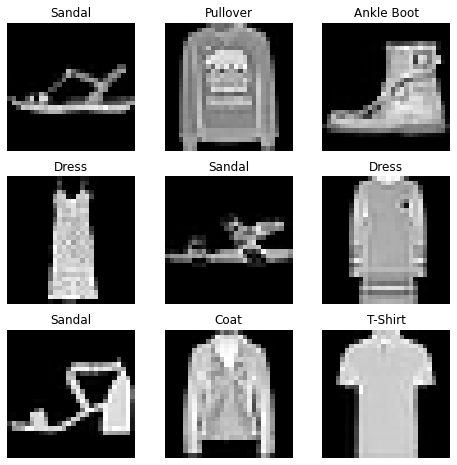

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## 自定义DataSet

自定义的Dataset必须实现3个方法：
* \_\_init\_\_
* \_\_len\_\_
* \_\_getite\_\_

FashionMNIST的图片数据存储在***img_dir***目录中，标签存储在一个CSV文件：***annotations_file***

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    #初始化必要的参数
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    #返回数据集长度
    def __len__(self):
        return len(self.img_labels)
    
    #获取指定index的数据
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

## DataLoader的使用

Dataset每次只能获取一个数据样本。当训练模型时，我们通常需要获取指定batch个数据。***DataLoader***是一个迭代对象，可以打乱数据集迭代返回指定大小的数据。

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


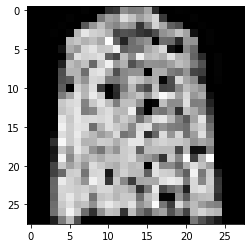

Label: 6


In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#迭代获取数据
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")